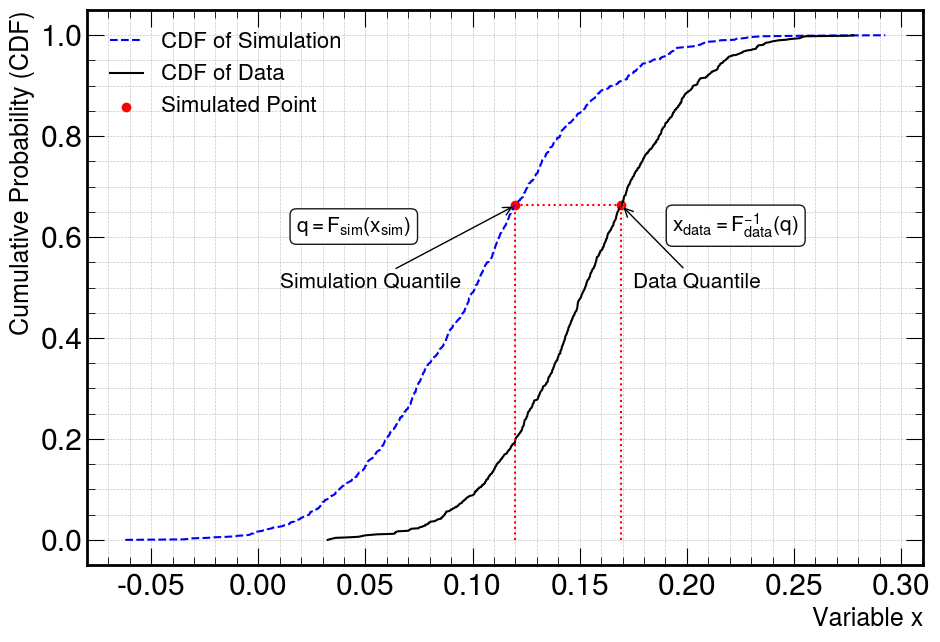

In [25]:
import mplhep
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
simulated_impact_param = np.random.normal(loc=0.1, scale=0.05, size=1000)  # Simulated data
data_impact_param = np.random.normal(loc=0.15, scale=0.04, size=1000)  # Real data

# Compute CDFs
sim_sorted = np.sort(simulated_impact_param)
data_sorted = np.sort(data_impact_param)
sim_cdf = np.linspace(0, 1, len(sim_sorted))
data_cdf = np.linspace(0, 1, len(data_sorted))

# Highlight a specific point and its mapping
impact_example = 0.12  # Example impact parameter value from simulation
sim_quantile = np.interp(impact_example, sim_sorted, sim_cdf)
data_mapped_value = np.interp(sim_quantile, data_cdf, data_sorted)

# Prepare the plot with mplhep styling
plt.figure(figsize=(10, 7))
mplhep.style.use("CMS")  # Use CMS style

# Plot the CDFs
plt.plot(sim_sorted, sim_cdf, label="CDF of Simulation", color="blue", linestyle="--")
plt.plot(data_sorted, data_cdf, label="CDF of Data", color="black")

# Highlight a specific point and its mapping
plt.scatter([impact_example], [sim_quantile], color="red", label="Simulated Point")
plt.scatter([data_mapped_value], [sim_quantile], color="red")
plt.vlines(x=impact_example, ymin=0, ymax=sim_quantile, colors="red", linestyles="dotted")
plt.vlines(x=data_mapped_value, ymin=0, ymax=sim_quantile, colors="red", linestyles="dotted")
plt.hlines(y=sim_quantile, xmin=impact_example, xmax=data_mapped_value, colors="red", linestyles="dotted")
plt.annotate("Simulation Quantile", xy=(impact_example, sim_quantile), xytext=(0.01, 0.5),
             arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=15)
plt.annotate("Data Quantile", xy=(data_mapped_value, sim_quantile), xytext=(0.175, 0.5),
             arrowprops=dict(facecolor='red', arrowstyle="->"), fontsize=15)

formula_sim = r"$q = F_{\text{sim}}(x_{\text{sim}})$"
formula_data = r"$x_{\text{data}} = F_{\text{data}}^{-1}(q)$"

props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.9)

plt.text(0.25, 0.6, formula_sim, transform=plt.gca().transAxes, fontsize=15, bbox=props)
plt.text(0.7, 0.6, formula_data, transform=plt.gca().transAxes, fontsize=15, bbox=props)



# Customize plot
plt.xlabel("Variable x", fontsize=18)
plt.ylabel("Cumulative Probability (CDF)", fontsize=18)
plt.legend(fontsize=16)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show plot
plt.savefig("quantile_mapping.png")
